Why would we want to do a Monte Carlo Simulation? There could be hundreds of reasons and thousands of examples, but they all reduce down to one thing: predicting performance without conducting hundreds of experiments or building thousands of samples.

https://es.khanacademy.org

https://relopezbriega.github.io/blog/2017/01/10/introduccion-a-los-metodos-de-monte-carlo-con-python/

https://es.wikipedia.org/wiki/Camino_aleatorio



# Caminatas aleatorias

Imagina que estás parado en medio de una viga de equilibrio. Cada diez segundos, lanzas una moneda. Águila, da un paso adelante. Sol, da un paso hacia atrás. Esta es una caminata aleatoria: una ruta definida como una serie de pasos aleatorios.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

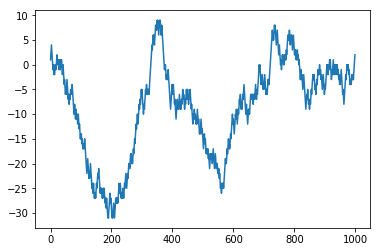

In [5]:
X_0 = 0 # inicia el caminador
elements = [1, -1] # Águila o Sol
probabilites = [0.5, 0.5]# P(Águila) = 0.5 P(Sol) = 0.5
delta_X = np.random.choice(elements, 1000, p=probabilites)

y = np.ones(len(np.cumsum(delta_X)) ) 
#plt.plot( np.cumsum(delta_X), y)
plt.plot( np.cumsum(delta_X))

Text(0,0.5,'Distancia')

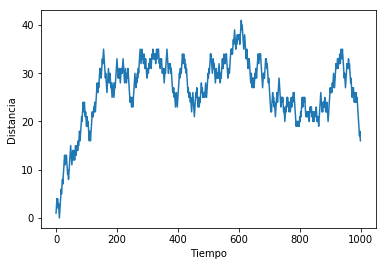

In [3]:
plt.plot( np.cumsum(delta_X))
plt.xlabel('Tiempo')
plt.ylabel('Distancia')

### Dos dimensiones 
Si te bajas de la viga de equilibrio y estás en el suelo, puedes realizar una caminata aleatoria en dos dimensiones lanzando esa misma moneda dos veces con los siguientes resultados:

Sí, esto puede parecer un algoritmo particularmente poco sofisticado. Sin embargo, las caminatas aleatorias pueden utilizarse para **modelar fenómenos que ocurren en el mundo real**, desde movimientos de moléculas en un gas hasta el comportamiento de un apostador que pasa un día en el casino. 


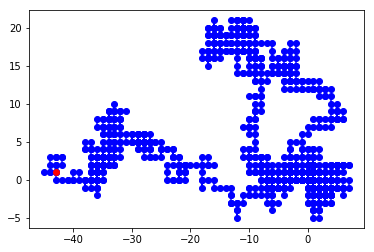

In [9]:
def walker():
    global x,y
    eleccion = random.randint(0,3)
    if eleccion == 0:
        x+=1
    elif eleccion == 1:
        x-=1
    elif eleccion ==2:
        y+=1
    else: 
        y-=1
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro-')

# Mejorar el caminante aleatorio

Hay un par de mejoras que podríamos hacerle al caminante aleatorio. Por ejemplo, las alternativas de los pasos de este caminante están limitadas a cuatro opciones: arriba, abajo, izquierda y derecha. 

**Pero cualquier pixel en la ventana tiene ocho vecinos posibles, y una novena posibilidad es permanecer en el mismo lugar.**

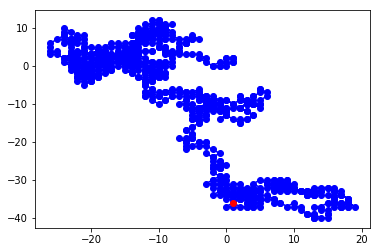

In [10]:
def walker():
    global x,y
    x += random.randint(-1,1)
    y += random.randint(-1,1)
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro-')

Llevando esto más lejos, en vez de eso, podríamos utilizar un decimal para x y  y y movernos de acuerdo con un valor arbitrario aleatorio entre -1 y 1, si nuestro entorno en realidad pudiera desplegar la diferencia entre "2.2" y "2.4":

In [8]:
random.uniform(-1,1) 

-0.4667035418024126

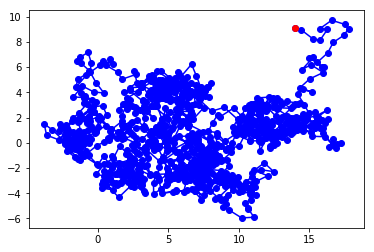

In [11]:
def walker():
    global x,y
    x += random.uniform(-1,1) 
    y += random.uniform(-1,1) 
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro-')

# Mejorando el código 


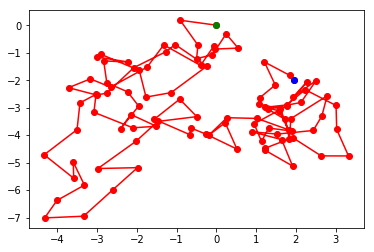

In [18]:
X_0 = np.array([[0],[0]]) 
delta_X = np.random.uniform(-1,1,(2,100))

X = np.concatenate( (X_0,np.cumsum(delta_X,axis=1)),axis=1 )
rw = plt.plot(X[0],X[1],'ro-')
plt.plot(X[0,-1],X[1,-1],'bo')
plt.plot(X[0,0],X[1,0],'go')

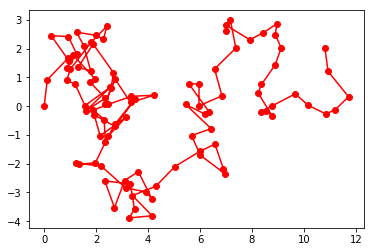

In [19]:
# Condiciones iniciales de nuestra caminata aleatoria
X_0 = np.array([[0],[0]]) #Cada renglón va a ser la coordenada x y la coordenada y, 
delta_X = np.random.uniform(-1,1,(2,100))# Vamos a comenzar con un caminante aleatorio 

# generar las posiciones definitivas del caminante aleatorio (Suma acumulativa)
X = np.concatenate( (X_0,np.cumsum(delta_X,axis=1)),axis=1 )
rw = plt.plot(X[0],X[1],'ro-')

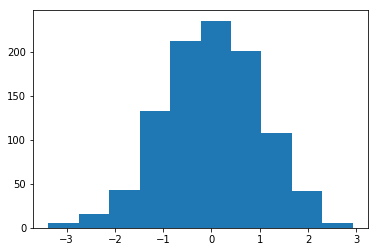

In [20]:
plt.hist(np.random.normal(0,1,(1000,1)));

# Probabilidad y distribuciones no uniformes

Con algunos trucos, podemos cambiar la forma en que utilizamos random() para producir distribuciones “no uniformes” de números aleatorios.

Cuando examinemos algoritmos genéticos, por ejemplo, vamos a necesitar una metodología para realizar la “selección”: ¿cuáles miembros de nuestra población deben seleccionarse para pasar su ADN a la próxima generación? ¿Recuerdas el concepto de supervivencia del más apto? Digamos que tenemos una población de monos que evolucionan. No todos los monos tendrán una oportunidad igual de reproducirse. Para simular la evolución darwiniana, no podemos simplemente escoger dos monos al azar para que sean padres. Necesitamos que los más “aptos” sean más probables de ser elegidos. Necesitamos definir la “probabilidad del más apto”. Por ejemplo, un mono particularmente rápido y fuerte podría tener un 90% de probabilidad de procrear, mientras que uno más débil tiene solo un 10% de probabilidad.

# Podríamos usar la metodología anterior para crear un caminante aleatorio que tienda a moverse hacia la derecha. 

Aquí está un ejemplo de un Walker con las siguientes probabilidades:

- probabilidad de moverse hacia arriba : 20%
- probabilidad de moverse hacia abajo : 20%
- probabilidad de moverse hacia la izquierda: 20%
- probabilidad de moverse hacia la derecha: 40%


In [21]:
random.uniform(0,1)

0.9820039551901891

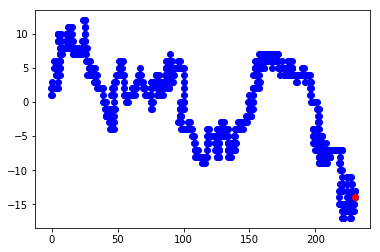

In [22]:
def walker():
    global x,y
    eleccion = random.uniform(0,1)
    if eleccion < 0.40:
        x+=1
    elif eleccion < 0.60:
        x-=1
    elif eleccion < 0.8:
        y+=1
    else: 
        y-=1
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro-')

# Desafío: caminante hacia arriba

Actualmente, nuestro caminante tiende a caminar hacia la derecha.

Cambia la lógica de modo que tenga un 
- 10% de probabilidad de caminar a la derecha,
- 10% de probabilidad de caminar a la izquierda,
- 60% de probabilidad de caminar hacia arriba y 
- 20% de probabilidad de caminar hacia abajo.

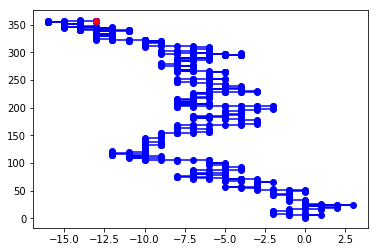

In [23]:
def walker():
    global x,y
    eleccion = random.uniform(0,1)
    if eleccion < 0.10:
        x+=1
    elif eleccion < 0.20:
        x-=1
    elif eleccion < 0.8:
        y+=1
    else: 
        y-=1
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro-')

# Desafío: caminata gaussiana

Este caminante camina un tamaño de paso aleatorio en cada dirección, pero ahora queremos que utilice una distribución normal para elegir el tamaño de paso. Empieza almacenando una nueva instancia de Random() en la variable generator en la parte superior del programa.

In [24]:
np.random.normal(0,20)

-13.513037267878003

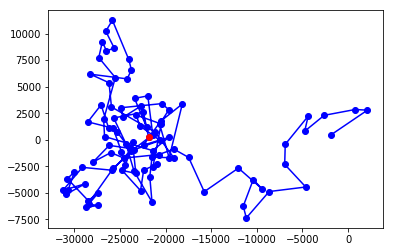

In [25]:
def walker():
    global x,y
    x += np.random.normal(0,2000)
    y += random.gauss(0,2000) 
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,100))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro')

# Distribución personalizada de números aleatorios

Llegará un momento en tu vida cuando no quieras una distribución uniforme de valores aleatorios, o una gaussiana. 

Imaginemos por un momento que eres un caminante aleatorio en busca de alimento. Moverte aleatoriamente en un espacio parece ser una estrategia razonable para encontrar algo para comer. Después de todo, no sabes dónde está la comida, así que bien puedes buscar aleatoriamente hasta encontrarla. 

El problema, como podrás haber notado, es que los caminantes aleatorios regresan a lugares previamente visitados muchas veces (esto se conoce como “sobremuestreo”, “oversampling” en inglés). 

Una estrategia para evitar este problema es, cada cierto tiempo, dar un paso muy grande.

Esto permite que el caminante busque aleatoriamente alrededor de una ubicación específica mientras que periódicamente salta muy lejos para reducir la cantidad de sobremuestreo.

**Esta variación de la caminata aleatoria (conocida como un vuelo de Lévy) requiere un conjunto personalizado de probabilidades. Aunque no es una implementación exacta de un vuelo de Lévy,** podríamos formular la distribución de probabilidad como sigue: mientras más largo el paso, es menor la probabilidad de ser elegido; mientras más corto el paso, es mayor la probabilidad.

Anteriormente en esta sección, vimos que podríamos generar distribuciones de probabilidad personalizadas rellenando un arreglo con valores (algunos duplicados para que fueran escogidos con mayor frecuencia) o probando el resultado de random(). Podríamos implementar un vuelo de Lévy diciendo que hay una probabilidad del 1% de que el caminante tome un paso largo.

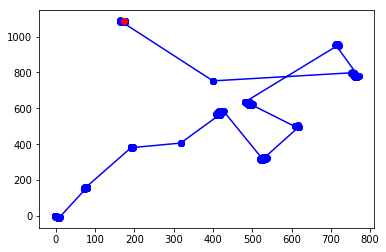

In [27]:
def walker():
    global x,y
    r = random.uniform(0,1)
    if r< 0.01: # un 1% de probabilidad de tomar un paso grande
        x += np.random.normal(0,200)
        y += random.gauss(0,200) 
    else:
        x += np.random.normal(0,1)
        y += random.gauss(0,1) 
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro')

Sin embargo, esto reduce las probabilidades a un número fijo de opciones. 

**¿Qué pasa si queremos hacer una regla más general; mientras más grande sea el número, más probabilidad tiene de ser elegido?** 3.145 sería más probable de ser elegido que 3.144, incluso si esa probabilidad es solo un poquito mayor. En otras palabras, si x es el número aleatorio, podríamos mapear la probabilidad en el eje y con y = x.

In [31]:
def monteCarlo():
    while(True):
        r1 = random.uniform(0,1)
        probabilidad = r1
        r2 = random.uniform(0,1)
        
        if r2 < probabilidad:
            return r1

In [37]:
monteCarlo()

0.758295779644766

# Desafío: caminante de Lévy

## Utiliza el método Monte Carlo


Queremos que la cambies a una distribución de probabilidad, en la que los pasos más cortos sean más probables, al usar los valores de la función monteCarlo en su lugar.

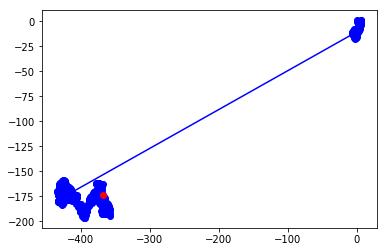

In [38]:
def monteCarlo():
    while(True):
        r1 = random.uniform(0,10)
        probabilidad = r1
        r2 = random.uniform(0,10)
        
        if r2 > probabilidad:
            return r1
        
def walker():
    global x,y
    r = monteCarlo()
    if r< 0.01: # un 1% de probabilidad de tomar un paso grande
        x += np.random.normal(0,200)
        y += random.gauss(0,200) 
    else:
        x += np.random.normal(0,1)
        y += random.gauss(0,1) 
    return [x,y]

x=0 # inicia el caminador
y=0

Pos = np.zeros((2,1000))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

plt.plot(Pos[0,:],Pos[1,:],'bo-')
plt.plot(Pos[0,-1],Pos[1,-1],'ro')

<IPython.core.display.Javascript object>


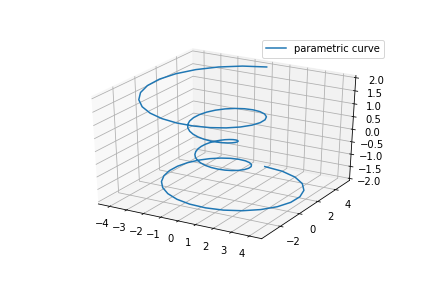

In [44]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


In [19]:
#!pip install pythreejs

In [42]:
%matplotlib notebook

<IPython.core.display.Javascript object>


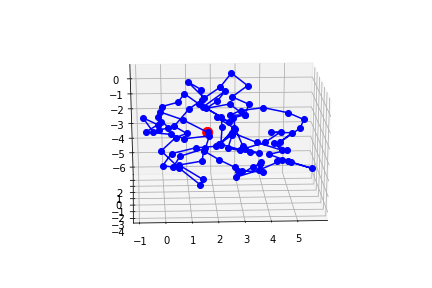

In [45]:
def walker():
    global x,y,z
    x += random.uniform(-1,1) 
    y += random.uniform(-1,1) 
    z += random.uniform(-1,1) 
    return [x,y,z]


x=0 # inicia el caminador
y=0
z=0

Pos = np.zeros((3,100))

for i in np.arange(0,len(Pos[0]),1):
    Pos[:,i] = walker()

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(Pos[0,:],Pos[1,:],Pos[2,:],'bo-')
ax.scatter3D(Pos[0,-1],Pos[1,-1],Pos[2,-1],c='r',s=(100,100))


<IPython.core.display.Javascript object>


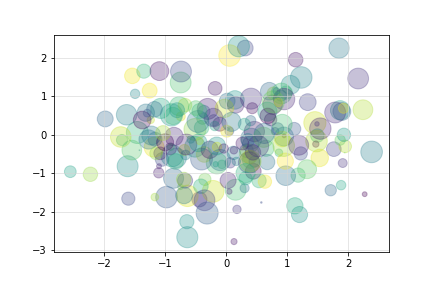

In [46]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)

In [677]:
#!pip install mpld3

In [33]:
import mpld3
mpld3.display(fig)

In [570]:
random.uniform(0,1)

0.0583983145304654

In [414]:
random.uniform(-1,1)

-0.2658049198143364

In [97]:
np.random.randint(-1,high=1, size=[2,2])

array([[ 0, -1],
       [-1, -1]])

In [115]:
elements = [1, -1] # Águila o Sol
probabilites = [0.5, 0.5]# P(Águila) = 0.5 P(Sol) = 0.5
delta_X = np.random.choice(elements, size=[2,10], p=probabilites)
delta_X

array([[ 1,  1,  1, -1,  1,  1, -1, -1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1, -1, -1,  1]])

In [117]:
x=0
x+=1
x

1